In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#import the ML libs
import sklearn
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

warnings.filterwarnings('ignore')


print("scikit-learn version:", sklearn.__version__)    
print("pandas version:", pd.__version__)            
print("seaborn version:", sns.__version__)  
print("matplotlib version:", matplotlib.__version__) 

scikit-learn version: 0.24.1
pandas version: 1.2.4
seaborn version: 0.11.1
matplotlib version: 3.4.1


In [2]:
df = pd.read_csv("JobPosting.csv", index_col=0)
print(df.shape)

(73462, 14)


In [3]:
df.sample(10)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
5439,<35,No,NoHigherEd,1,Man,Yes,Dev,15,13,Finland,76750.0,Bash/Shell;PHP;SQL;Docker;Git;AWS;Google Cloud...,10,0
3623,>35,No,PhD,1,Man,No,NotDev,49,44,United States of America,98000.0,R,1,0
14990,>35,No,Master,0,Man,No,Dev,15,5,United Kingdom of Great Britain and Northern I...,73700.0,C#;Java;JavaScript;PHP;SQL;VBA;Git;ASP.NET;ASP...,16,1
62394,>35,No,Undergraduate,1,Man,No,Dev,40,31,Australia,92002.0,C#;C++;HTML/CSS;Java;Kotlin;Objective-C;PHP;Py...,12,1
57569,<35,No,Undergraduate,1,Man,No,Dev,8,4,Netherlands,34272.0,Delphi;HTML/CSS;JavaScript;TypeScript;Docker;n...,16,1
58974,<35,No,Undergraduate,1,Man,No,Dev,4,2,United States of America,90000.0,Bash/Shell;C#;HTML/CSS;JavaScript;Python;SQL;T...,18,1
66092,<35,No,Master,1,Man,No,Dev,5,5,Russian Federation,69612.0,HTML/CSS;JavaScript;TypeScript;npm;Node.js;Rea...,6,1
57115,>35,No,Undergraduate,1,Man,No,Dev,20,15,United States of America,140000.0,Assembly;C;C#;C++;JavaScript;Python;Docker;npm...,10,1
25072,<35,No,Master,1,Man,No,Dev,8,4,Germany,73507.0,Bash/Shell;C++;Go;JavaScript;Node.js;PHP;Pytho...,21,1
1440,<35,No,Undergraduate,1,Man,Yes,Dev,7,2,Canada,30250.0,Go;HTML/CSS;JavaScript;Node.js;PHP;TypeScript;...,13,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73462 entries, 0 to 73461
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             73462 non-null  object 
 1   Accessibility   73462 non-null  object 
 2   EdLevel         73462 non-null  object 
 3   Employment      73462 non-null  int64  
 4   Gender          73462 non-null  object 
 5   MentalHealth    73462 non-null  object 
 6   MainBranch      73462 non-null  object 
 7   YearsCode       73462 non-null  int64  
 8   YearsCodePro    73462 non-null  int64  
 9   Country         73462 non-null  object 
 10  PreviousSalary  73462 non-null  float64
 11  HaveWorkedWith  73399 non-null  object 
 12  ComputerSkills  73462 non-null  int64  
 13  Employed        73462 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 8.4+ MB


In [5]:
df.isnull().sum()

Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64

In [6]:
df[df.duplicated(keep=False)]

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
3134,>35,No,Undergraduate,1,Man,No,Dev,39,27,Croatia,26124.0,SQL;Oracle,2,0
6652,>35,No,Master,0,Man,No,Dev,25,15,Italy,129718.0,Go;Java;JavaScript;Kotlin;Node.js;Rust;TypeScr...,16,1
6664,>35,No,Master,0,Man,No,Dev,25,15,Italy,129718.0,Go;Java;JavaScript;Kotlin;Node.js;Rust;TypeScr...,16,1
7280,<35,No,Undergraduate,1,Man,No,Dev,4,0,India,2653.0,Java;Python;Docker;Git;Kubernetes;Flask;Spring...,10,0
7329,<35,No,Undergraduate,1,Man,No,Dev,4,0,India,2653.0,Java;Python;Docker;Git;Kubernetes;Flask;Spring...,10,0
7783,>35,No,Undergraduate,1,Man,No,Dev,39,27,Croatia,26124.0,SQL;Oracle,2,0
45964,<35,No,Undergraduate,1,Man,No,Dev,17,10,Finland,44796.0,C#;Java;Python;Ansible;Docker;Unity 3D;Microso...,10,1
46025,<35,No,Undergraduate,1,Man,No,Dev,17,10,Finland,44796.0,C#;Java;Python;Ansible;Docker;Unity 3D;Microso...,10,1


In [7]:
# Droping rows with null values together with duplicated rows

In [8]:
df.dropna(inplace=True)

In [9]:
df=df.drop_duplicates(keep='first', ignore_index=True)

In [10]:
df.shape

(73395, 14)

##### Splitting data

In [11]:
X = df.drop(['Employed'],axis=1)
y = df['Employed']

In [12]:
tfidf_vectorizer = TfidfVectorizer(min_df=.01, use_idf =True, stop_words = 'english')
tf_X_vectorized = tfidf_vectorizer.fit_transform(df['HaveWorkedWith']).toarray()
tf_X_vectorized.shape

(73395, 100)

In [13]:
X = pd.DataFrame(tf_X_vectorized)
X['HaveWorkedWith'] = df["HaveWorkedWith"].values
y = df['Employed']
X.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,HaveWorkedWith
9671,0.0,0.150429,0.0,0.0,0.0,0.112483,0.146941,0.134759,0.0,0.0,...,0.120872,0.0,0.0,0.249195,0.0,0.172775,0.0,0.0,0.156714,Bash/Shell;C++;Dart;Groovy;HTML/CSS;Java;JavaS...
18077,0.0,0.328979,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.264340,0.0,0.0,0.000000,0.0,0.377848,0.0,0.0,0.000000,HTML/CSS;JavaScript;Node.js;PHP;TypeScript;Git...
7114,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,HTML/CSS;JavaScript;PHP;SQL;Git;jQuery;MariaDB...
59180,0.0,0.292139,0.0,0.0,0.0,0.218446,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,C#;HTML/CSS;Java;JavaScript;Python;Ruby;SQL;An...
16385,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,C;HTML/CSS;Java;JavaScript;Node.js;Python;SQL;...


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 73395 observations, of which 58716 are now in the train set, and 14679 in the test set.


In [15]:
X_train = X_train.drop(['HaveWorkedWith'], axis=1)
X_HaveWorkedWith_text = X_test['HaveWorkedWith']
X_test = X_test.drop(['HaveWorkedWith'], axis=1)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.8630696913958716


In [17]:
pred = model.predict(X_train.values)
report= classification_report(y_train,pred)
print(report)

pred = model.predict(X_test.values)
report= classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91     27246
           1       0.93      0.91      0.92     31470

    accuracy                           0.91     58716
   macro avg       0.91      0.91      0.91     58716
weighted avg       0.91      0.91      0.91     58716

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      6759
           1       0.88      0.86      0.87      7920

    accuracy                           0.86     14679
   macro avg       0.86      0.86      0.86     14679
weighted avg       0.86      0.86      0.86     14679



In [18]:
# Search for optimal K

Minimum error:  0.13182096873083998 at K = 9


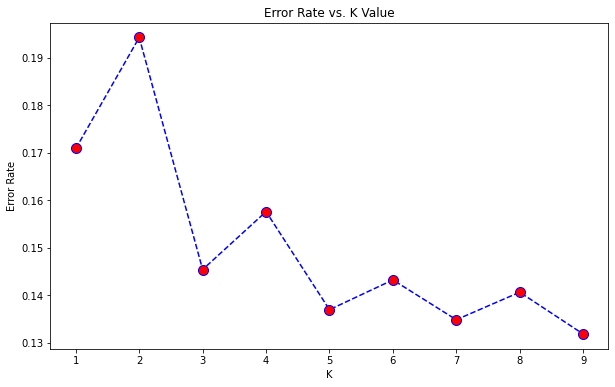

In [19]:
from sklearn import metrics
acc=[]
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    acc.append(metrics.accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error: ",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [20]:
# Use optimal K

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.8681790312691601


In [22]:
# Print report

In [23]:
pred = model.predict(X_train.values)
report= classification_report(y_train,pred)
print(report)

pred = model.predict(X_test.values)
report= classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     27246
           1       0.91      0.89      0.90     31470

    accuracy                           0.90     58716
   macro avg       0.90      0.90      0.90     58716
weighted avg       0.90      0.90      0.90     58716

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      6759
           1       0.89      0.86      0.88      7920

    accuracy                           0.87     14679
   macro avg       0.87      0.87      0.87     14679
weighted avg       0.87      0.87      0.87     14679

